In [1]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")
import torch
from matplotlib.pyplot import figure
from datasets import DatasetSinteticUnsupervisedLSTM

figure(figsize=(8, 6), dpi=80)

limiter = 2000

ABS_PATH = '/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset'

test_dataset = DatasetSinteticUnsupervisedLSTM(dir_data=f'{ABS_PATH}/Datasets/sintetic_data/test_compressor_data.h5',
                                           context=400,
                                           stride=1)

test_loader = torch.utils.data.DataLoader(
                test_dataset, batch_size=1, shuffle=False
                )

100%|██████████████████████████████| 149600/149600 [00:00<00:00, 1880724.15it/s]

len dataset:149600


<Figure size 640x480 with 0 Axes>

In [2]:
def union_vector_predicted_dict(data_predict:dict):
    
    x_concat = data_predict[0]
    
    del data_predict[0]
    
    keys_predicted = list(data_predict.keys())
    
    for key in keys_predicted:
        x_concat = torch.concat((x_concat, data_predict[key]), dim=1)
        
        del data_predict[key]
    
    return x_concat

In [3]:
data_predict = torch.load(f"../sintetic_generate_data_LSTM.pt")

In [4]:
data_predict[0].shape

torch.Size([1, 1, 4])

In [5]:
vet_predict = union_vector_predicted_dict(data_predict)

In [6]:
vet_predict.shape

torch.Size([1, 2400, 4])

## Concat Vets

In [7]:
x_true, _ = test_loader.dataset[0]

get_n_elements = 5

for i in range(1, get_n_elements):
    
    x_second, _ = test_loader.dataset[i]
    
    x_true = torch.concat((x_true, x_second), dim=0)
    
x_true.shape, vet_predict.shape

(torch.Size([2000, 4]), torch.Size([1, 2400, 4]))

### First channel

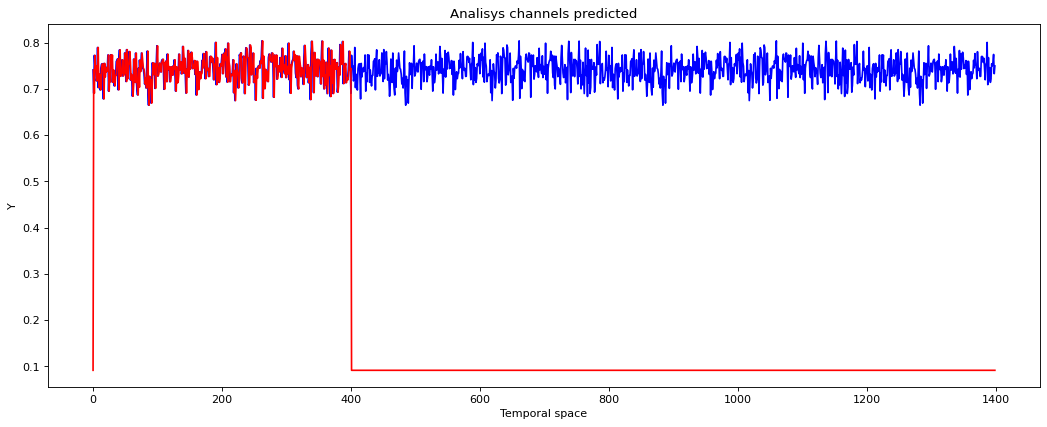

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)

limiter = 1400

#plt.plot(data_normal_train[:limiter,0])

#fig, axs = plt.subplots(1, 2, figsize=(15, 15))

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
plt.plot(x_true[:limiter, feature_channel], color='blue', label='sinal Real')
plt.plot(vet_predict[0][:limiter, feature_channel], color='r', label='sinal previsto')
